# Previsão de Rotatividade de Funcionários

A empresa XYZ, com cerca de 4000 funcionários, enfrenta uma taxa de rotatividade anual de 15%. Esse alto índice de saída prejudica a produtividade, gera custos com recrutamento e treinamento de novos colaboradores. O objetivo é construir um modelo que preveja a probabilidade de um funcionário deixar a empresa, identificando os principais fatores que influenciam essa decisão. Com essas informações, a empresa poderá tomar medidas para melhorar a retenção de talentos e reduzir os impactos da rotatividade.

Esta é uma tarefa de classificação, em que temos que prever se o funcionário irá ou não sair da empresa.

## Configuração inicial

Primeiramente, estarei preparando o ambiente para realizar a análise de dados e gerar gráficos personalizados. O código importa as bibliotecas necessárias, como `numpy` e `pandas` para manipulação de arrays e DataFrames, respectivamente, e `matplotlib` para criação de gráficos.

In [127]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

É importante também configurar a semente aleatória para garantir que os resultados da análise sejam reprodutíveis.

In [128]:
seed = 42
np.random.seed(seed)

## Obtenção dos dados

Nesta seção, vamos carregar o nosso conjunto de dados.

Como estou desenvolvendo diretamente no Colab, quero evitar a necessidade de adicionar o conjunto de dados manualmente. Por isso, implementei a seguinte verificação.

In [129]:
import os

file_path = os.path.join('data', 'data.csv')

if os.path.exists(file_path):
    employees = pd.read_csv(file_path)
else:
    url = 'https://raw.githubusercontent.com/amandatz/employee-attrition-analysis/main/data/data.csv'
    employees = pd.read_csv(url)

## Descrição








O conjunto possui 24 colunas, sendo elas:

| **#** | **Atributo**                 | **Descrição**                                                     | **Rótulos (Labels)**                                    |
|-------|------------------------------|-------------------------------------------------------------------|--------------------------------------------------------|
| 1     | **Age**                       | Idade do empregado                                                |                                                        |
| 2     | **Attrition**                 | Se o empregado deixou a empresa no último ano ou não              |                                                        |
| 3     | **BusinessTravel**            | Frequência com que os empregados viajaram para fins de negócios no último ano |                                                        |
| 4     | **Department**                | Departamento em que o empregado trabalha                          |                                                        |
| 5     | **DistanceFromHome**          | Distância de casa em quilômetros                                  |                                                        |
| 6     | **Education**                 | Nível de escolaridade do empregado                                | 1. Abaixo do Ensino Superior (Below College) <br> 2. Ensino Superior (College) <br> 3. Bacharelado (Bachelor) <br> 4. Mestrado (Master) <br> 5. Doutorado (Doctor)|
| 7     | **EducationField**            | Área de formação do empregado                                     |                                                        |
| 8     | **EmployeeCount**             | Contagem de empregados                                            |                                                        |
| 9     | **EmployeeID**            | Número ou ID do empregado                                         |                                                        |
| 10    | **Gender**                    | Gênero do empregado                                               |                                                        |
| 11    | **JobLevel**                  | Nível de cargo na empresa, em uma escala de 1 a 5                 |                                                        |
| 12    | **JobRole**                   | Cargo ocupado pelo empregado na empresa                           |                                                        |
| 13    | **MaritalStatus**             | Estado civil do empregado                                         |                                                        |
| 14    | **MonthlyIncome**             | Renda mensal em rúpias (Moeda Indiana)                            |                                                        |
| 15    | **NumCompaniesWorked**        | Número total de empresas nas quais o empregado trabalhou          |                                                        |
| 16    | **Over18**                    | Indica se o empregado tem mais de 18 anos ou não                   |                                                        |
| 17    | **PercentSalaryHike**         | Percentual de aumento salarial no último ano                      |                                                        |
| 18    | **StandardHours**             | Número de horas padrão de trabalho para o empregado               |                                                        |
| 19    | **StockOptionLevel**          | Nível de opções de ações do empregado                             |                                                        |
| 20    | **TotalWorkingYears**         | Número total de anos que o empregado trabalhou                     |                                                        |
| 21    | **TrainingTimesLastYear**     | Número de vezes que o empregado participou de treinamentos no último ano |                                                        |
| 22    | **YearsAtCompany**            | Número total de anos que o empregado trabalhou na empresa         |                                                        |
| 23    | **YearsSinceLastPromotion**   | Número de anos desde a última promoção                            |                                                        |
| 24    | **YearsWithCurrManager**      | Número de anos com o atual gerente                                |                                                        |




A coluna "Attrition" é a variável dependente. Ela nos indica se o funcionário deixou a empresa no ano anterior ou não. Este é o objetivo do modelo: prever se um funcionário vai deixar a empresa com base nas outras variáveis.

**Observação 1:** Como o salário mensal está em Rúpias, imagino que esse dataset seja indiano. Observe a coluna "Education", existem níveis de educação que não fazem muito sentido no contexto brasileiro: Qual seria a diferença entre Ensino Superior e Bacharelado?. Observando [esta página da Wikipedia](https://en.wikipedia.org/wiki/Higher_education_in_India#Post-secondary_education_stages), imagino que "College" se refira ao "Vocational Degree", que é equivalente ao curso técnico brasileiro. Já o "Bachelor" se refere a um curso de graduação convencional.

**Observação 2:** A coluna "EmployeeCount" não faz sentido no contexto do conjunto de dados, porque cada registro já representa um único empregado. Posteriormente, é possível verificar que essa coluna é constante com todos os registros iguais a 1. Ela será eventualmente removida.

Vejamos as 5 primeiras linhas do dataset:

In [130]:
employees.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [131]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [132]:
employees.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


Pelos histogramas conseguimos verificar que diversas colunas admitem valores discretos e até mesmo contínuos.

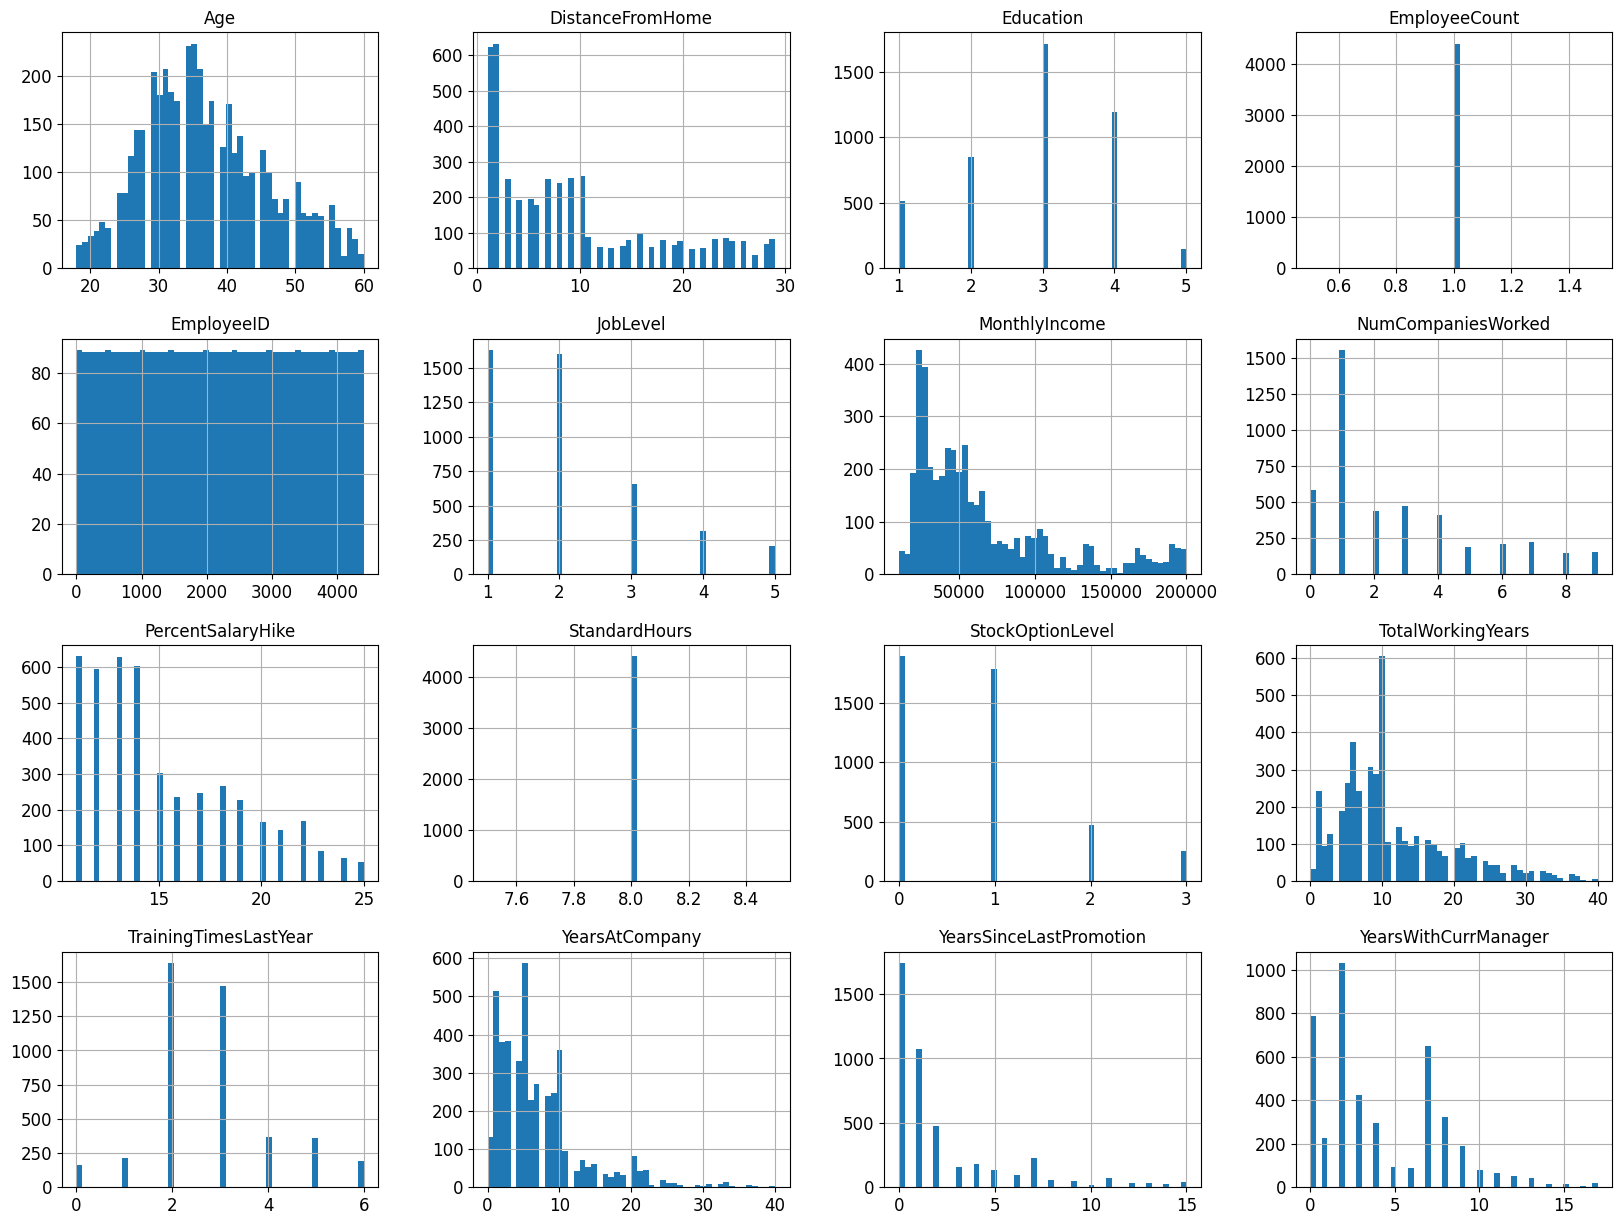

In [133]:
employees.hist(bins=50, figsize=(20,15))
plt.show()

## Separação dos dados

In [134]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(employees,
                                       test_size=0.2,
                                       random_state=seed)

train_set.shape, test_set.shape

((3528, 24), (882, 24))

## Visualização do conjunto de dados

Antes de começarmos, vamos garantir que estamos trabalhando exclusivamente no conjunto de treinamento para prevenir o snooping bias.

In [135]:
employees = train_set.copy()

Começaremos plotando a matriz de correlação entre as colunas numéricas

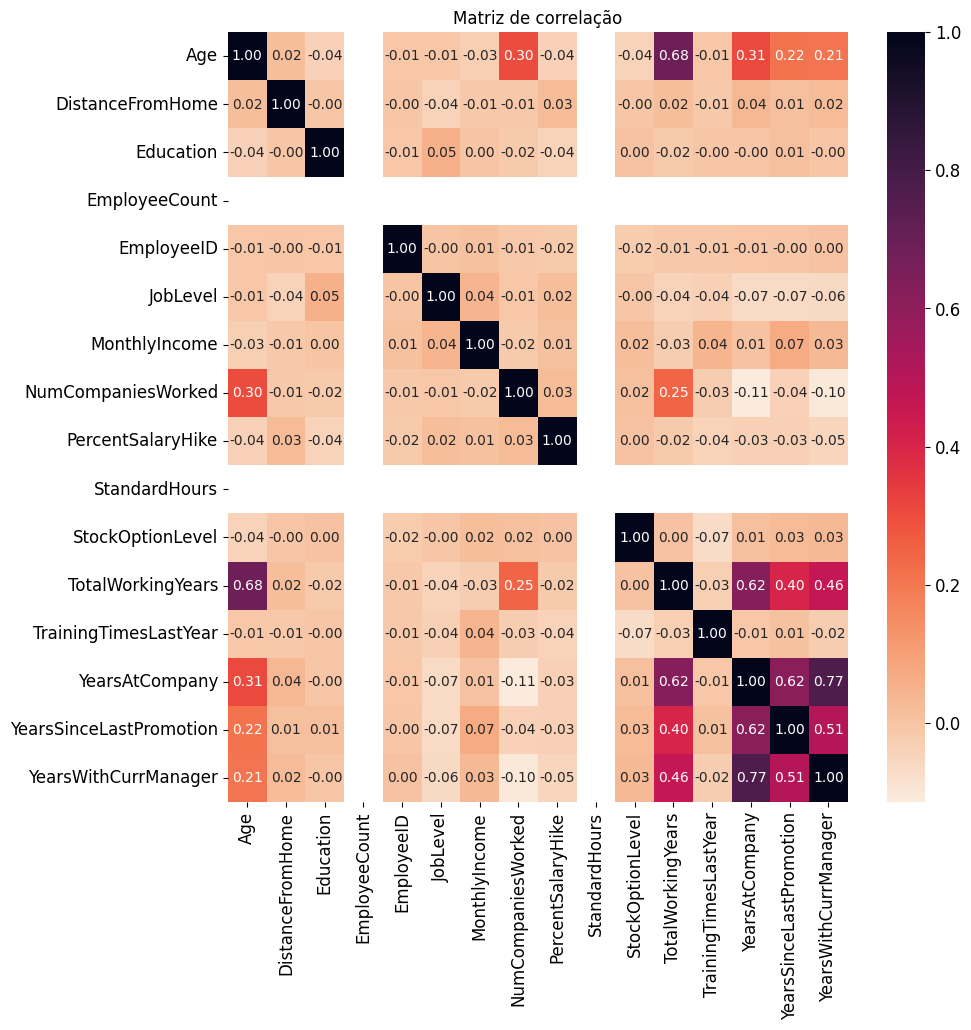

In [136]:
import seaborn as sns

corr_matrix = employees.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='rocket_r', ax=ax)
plt.title('Matriz de correlação')
plt.show()

A matriz de correlação mostra que algumas variáveis possuem correlação significativa, como TotalWorkingYears e YearsAtCompany (0.62), indicando que empregados com mais anos de experiência tendem a permanecer mais tempo na empresa. Também há uma correlação de 0.68 entre TotalWorkingYears e Age, sugerindo que funcionários mais velhos têm mais experiência.

Por outro lado, variáveis como PercentSalaryHike, StockOptionLevel, e JobLevel apresentam baixa correlação com outras variáveis, o que sugere que não influenciam fortemente a permanência dos empregados na empresa.

Verificarremos se anos de experiência total (TotalWorkingYears), com o atual gerente (YearsWithCurrManager) e desde a última promoção (YearsSinceLastPromotion) influenciam a insatisfação.

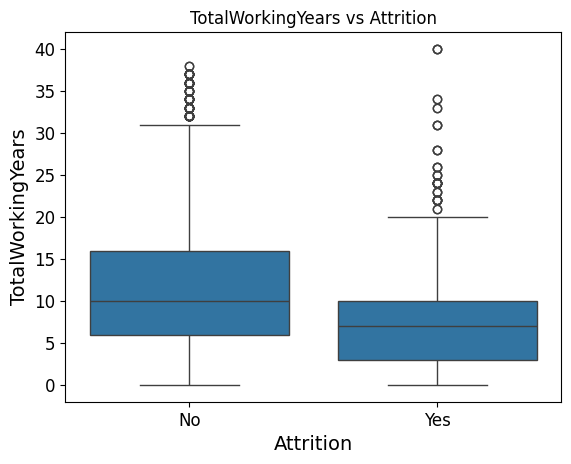

In [137]:
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=employees)
plt.title('TotalWorkingYears vs Attrition')
plt.show()

Note que pessoas que saíram da empresa tendem a ter menos anos de experiência, enquanto aquelas que permaneceram apresentam uma distribuição mais ampla e com mais pessoas acumulando muitos anos de trabalho. Isso sugere que indivíduos com menos experiência têm maior probabilidade de sair, enquanto os mais experientes tendem a permanecer.

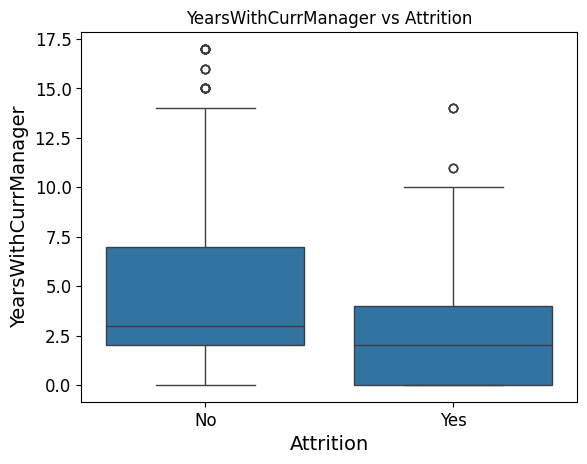

In [138]:
sns.boxplot(x='Attrition', y='YearsWithCurrManager', data=employees)
plt.title('YearsWithCurrManager vs Attrition')
plt.show()

Além disso, funcionários que deixaram a empresa tendem a ter menos anos trabalhando com o mesmo gerente, com a maioria acumulando menos de 3 anos. Já aqueles que permaneceram possuem uma mediana maior. Isso sugere que a estabilidade na relação com o gerente pode estar associada a uma maior retenção de funcionários.








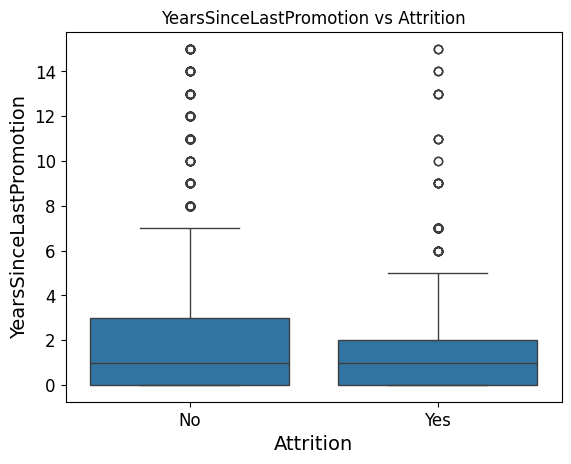

In [139]:
sns.boxplot(x='Attrition', y='YearsSinceLastPromotion', data=employees)
plt.title('YearsSinceLastPromotion vs Attrition')
plt.show()

Já a relação entre `Attrition` e `YearsSinceLastPromotion`, não há uma diferença significativa no tempo desde a última promoção entre os funcionários que saíram e os que permaneceram. Em ambos os grupos, há uma distribuição similar, com alguns outliers que indicam períodos mais longos sem promoção. Isso sugere que o tempo desde a última promoção pode não ser um fator determinante para a saída de funcionários

É natural questionar se existe relação entre o salário mensal e a saída dos funcionários. O próximo boxplot mostra que, embora os funcionários que permaneceram na empresa tenham uma mediana de salário mensal ligeiramente maior do que os que saíram, a diferença entre os dois grupos não é muita, com as distribuições sendo bastante semelhantes e com ampla sobreposição. Isso sugere que o salário mensal, isoladamente, pode não ser um fator crítico na decisão de saída dos funcionários.

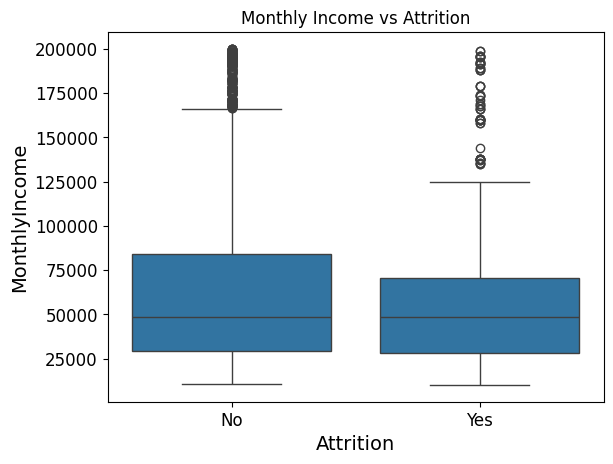

In [140]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=employees)
plt.title('Monthly Income vs Attrition')
plt.show()

Determinar se certas áreas de formação (EducationField) estão associadas a maior rotatividade.

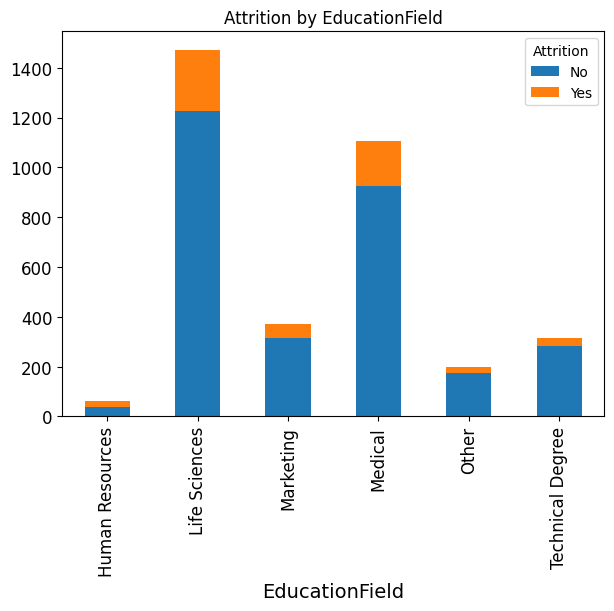

In [141]:
attrition_education = employees.groupby(['EducationField', 'Attrition']).size().unstack()
attrition_education.plot(kind='bar', stacked=True, figsize=(7, 5))
plt.title('Attrition by EducationField')
plt.show()

Ironicamente, a área com maior proporção de saída foi `Human Resources`.

In [142]:
attrition_proportion = employees.groupby('EducationField')['Attrition'].value_counts(normalize=True).unstack().fillna(0)
attrition_proportion['Yes']

,Yes
EducationField,
Human Resources,0.406250
Life Sciences,0.167120
Marketing,0.158177
Medical,0.161991
Other,0.121827
Technical Degree,0.113565


## Preparação dos dados




In [143]:
employees_target = employees['Attrition'].copy()
employees_features = employees.drop('Attrition', axis=1)

Começaremos removendo a coluna de `EmployeeID`. Embora seja útil para identificar individualmente os registros de cada funcionário, ela não possui informações que possam ajudar diretamente na predição da rotatividade dos funcionários.

As colunas `Over18`, `StandardHours`, `EmployeeCount` são constantes, iremos removê-las também.

In [144]:
from sklearn.preprocessing import FunctionTransformer

columns_to_remove = ['EmployeeID', 'Over18', 'StandardHours', 'EmployeeCount']

def drop_columns(X):
    return X.drop(columns=columns_to_remove, errors='ignore')

column_remover = FunctionTransformer(drop_columns, validate=False)

O dataset possui alguns dados não preenchidos. Veja que `NumCompaniesWorked` e `TotalWorkingYears` possuem dados faltantes.

In [145]:
employees_features.isnull().sum()

,0
Age,0
BusinessTravel,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeID,0
Gender,0
JobLevel,0


Ambas as colunas são compostas inteiramentes por dados numéricos. Estaremos preenchendo os itens nulos com a mediana através do `SimpleImputer`. Para isso, criaremos um Pipeline.

Já o `StandardScaler` é utilizado para normalizar as variáveis numéricas. Isso é importante em modelos que são sensíveis à escala das variáveis, como a Regressão Logística e Support Vector Machine (SVM). Na etapa seguinte estaremos utilizando esses 2 modelos, além do Random Forest.

In [146]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

numeric_features = [
    'Age', 'DistanceFromHome', 'Education', 'JobLevel',
    'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
    'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
    'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

Além disso, existem diversas outras colunas não numéricas. Vejamos seus valores possíveis:

In [147]:
categorical_features = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

for column in categorical_features:
    print(f"Valores possíveis para '{column}':")
    print(employees_features[column].unique())
    print("-" * 40)


Valores possíveis para 'BusinessTravel':
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
----------------------------------------
Valores possíveis para 'Department':
['Research & Development' 'Sales' 'Human Resources']
----------------------------------------
Valores possíveis para 'EducationField':
['Life Sciences' 'Technical Degree' 'Human Resources' 'Medical'
 'Marketing' 'Other']
----------------------------------------
Valores possíveis para 'Gender':
['Female' 'Male']
----------------------------------------
Valores possíveis para 'JobRole':
['Sales Representative' 'Research Scientist' 'Laboratory Technician'
 'Manager' 'Sales Executive' 'Research Director'
 'Healthcare Representative' 'Manufacturing Director' 'Human Resources']
----------------------------------------
Valores possíveis para 'MaritalStatus':
['Divorced' 'Single' 'Married']
----------------------------------------


Precisamos transformar os valores dessas colunas em valores numéricos. A única coluna que possui valores que seguem uma ordem é a `BusinessTravel` (Non-Travel, Travel_Rarely, Travel_Frequently). Para ela, estaremos usando o `OrdinalEnconder`. Para colunas binárias, como `Gender`, também estaremos usando-o. As outras não seguem uma ordem clara; o melhor é utilizar `OneHotEncoder`.

Além disso, não sabemos se os dados de teste possuem todos os valores preenchidos. Para tando, também será preciso utilizar o `SimpleImputer` com a moda como estratégia de preenchimento.

In [148]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

ordinal_categories = {
    'BusinessTravel': ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'],
    'Gender': ['Male', 'Female']
}

ordinal_features = list(ordinal_categories.keys())

onehot_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan, categories=list(ordinal_categories.values())))
])

Combinamos todos os pré-processadores em um `ColumnTransformer` e juntaremos com o processo de remover a coluna num único Pipeline.

In [149]:
from sklearn.compose import ColumnTransformer

preprocessor = Pipeline(steps=[
    ('drop_column', column_remover),
    ('transformer', ColumnTransformer(
      transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', onehot_transformer, [col for col in categorical_features if col not in ordinal_features]),
        ('ord', ordinal_transformer, ordinal_features)
      ])
    )
])

employees_prepared = preprocessor.fit_transform(employees_features)

In [150]:
employees_prepared

array([[ 0.11614257, -0.75804238,  1.04559707, ...,  0.        ,
         1.        ,  1.        ],
       [ 0.88346652,  2.44627611, -0.90360581, ...,  1.        ,
         1.        ,  1.        ],
       [ 0.88346652,  0.35114479,  0.07099563, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.76079909,  1.95330403,  0.07099563, ...,  1.        ,
         1.        ,  0.        ],
       [-0.8704168 , -1.00452841,  0.07099563, ...,  0.        ,
         1.        ,  1.        ],
       [-1.19926992, -0.63479936,  0.07099563, ...,  0.        ,
         1.        ,  0.        ]])

In [151]:
employees_prepared.shape

(3528, 36)

In [152]:
onehot_columns = preprocessor.named_steps['transformer'].transformers_[1][1].get_feature_names_out()

all_columns = numeric_features + list(onehot_columns) + ordinal_features
all_columns

['Age',
 'DistanceFromHome',
 'Education',
 'JobLevel',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'BusinessTravel',
 'Gender']

## Comparação entre modelos


Antes de começar a comparação, precisamos transformar o target atual, que é categórico, em números. Utilizaremos o `LabelEncoder`, que irá mapear cada categoria em um respectivo número, como `{'No': 0, 'Yes': 1}`, gerando um array codificado com esses valores.

In [153]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
employees_target_encoded = label_encoder.fit_transform(employees_target)

for i, class_name in enumerate(label_encoder.classes_):
    print(f"{i} -> {class_name}")

0 -> No
1 -> Yes


A seguir, criamos algumas funções para calcular e exibir diversas métricas de avaliação de desempenho.




**Medida de desempenho**

Neste problema, o custo de falsos negativos (não identificar um funcionário que realmente irá sair) é elevado. O objetivo é identificar todos os funcionários com risco de saída para adotar medidas preventivas. Por isso, escolheremos o **recall** como a métrica principal, pois ele quantifica a proporção de funcionários que realmente saíram e foram corretamente identificados pelo modelo.

Você verá que ao decorrer do código optei por utilizar o parâmetro `weighted` para realizar o cálculo das métricas, isso porquê estamos trabalhando com um target desbalanceado: há uma quantidade muito grande de **Não** comparado aos **Sim**.

In [154]:
employees_target.value_counts(normalize=True)

,proportion
Attrition,
No,0.838435
Yes,0.161565


Além disso, um dos requisitos do problema é prever a probabilidade de um funcionário deixar a empresa. Levando isso em consideração, precisamos escolher modelos que nos mostre tal probabilidade. Portanto, foram escolhidos **Regressão Logística**, **Random Forest** e **Support Vector Machine**. Estaremos utilizando o `cross-validation` para fazer a validação.

In [172]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score

weighted_recall = make_scorer(recall_score, average='weighted')
weighted_precision = make_scorer(precision_score, average='weighted')
accuracy = make_scorer(accuracy_score)

def cross_validate(model, X_train, y_train):
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring=accuracy)
    cv_precision = cross_val_score(model, X_train, y_train, cv=5, scoring=weighted_precision)
    cv_recall = cross_val_score(model, X_train, y_train, cv=5, scoring=weighted_recall)

    print("Accuracy: %0.3f (+/- %0.3f)" % (cv_accuracy.mean(), cv_accuracy.std() * 2))
    print("Precision: %0.3f (+/- %0.3f)" % (cv_precision.mean(), cv_precision.std() * 2))
    print("Recall: %0.3f (+/- %0.3f)" % (cv_recall.mean(), cv_recall.std() * 2))

**Regressão Logística**

In [173]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=seed)

cross_validate(logistic, employees_prepared, employees_target_encoded)

Accuracy: 0.845 (+/- 0.012)
Precision: 0.812 (+/- 0.029)
Recall: 0.845 (+/- 0.012)


**Random Forest**

In [174]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=seed)

cross_validate(random_forest, employees_prepared, employees_target_encoded)

Accuracy: 0.978 (+/- 0.010)
Precision: 0.979 (+/- 0.009)
Recall: 0.978 (+/- 0.010)


**Support Vector Machine**

In [175]:
from sklearn.svm import SVC

svm = SVC(probability=True, random_state=seed)

cross_validate(svm, employees_prepared, employees_target_encoded)

Accuracy: 0.870 (+/- 0.015)
Precision: 0.877 (+/- 0.021)
Recall: 0.870 (+/- 0.015)


Os resultados indicam que o Random Forest foi o melhor modelo entre os três avaliados. Ele se destacou não apenas na métrica principal (recall), mas também nas demais, apresentando os melhores desempenhos gerais. Já o SVM e a Regressão Logística obtiveram resultados similares.

## Ajustes e seleção do modelo

Utilizaremos o `RandomizedSearch` para melhorar os parâmetros dos nossos modelos de Random Forest.

In [176]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 20, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=params,
                                   n_iter=10, scoring=weighted_recall, cv=10,
                                   random_state=seed, n_jobs=-1)

random_search_rf.fit(employees_prepared, employees_target_encoded)

print("Melhores parâmetros encontrados: ", random_search_rf.best_params_)
print("Melhor recall: ", random_search_rf.best_score_)

Melhores parâmetros encontrados:  {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Melhor recall:  0.9889462078289982


## Modelo e teste final

De acordo com os resultados anteriores, pode-se dizer que o Random Forest teve o melhor desempenho. Portanto, estaremos utilizando ele como modelo final.

In [177]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

metrics = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'])

def compute_metrics(name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    metrics.loc[f"{name}"] = [accuracy, precision, recall, f1]

In [178]:
X_test, y_test = test_set.drop(columns=['Attrition']), test_set['Attrition'].copy()

y_test_encoded = label_encoder.fit_transform(y_test)

In [179]:
X_test_prepared = preprocessor.fit_transform(X_test)

final_model = random_search_rf.best_estimator_
final_pred = final_model.predict(X_test_prepared)

compute_metrics('Final Model', y_test_encoded, final_pred)
print(metrics)

             Accuracy  Precision    Recall  F1 Score
Final Model  0.993197   0.993252  0.993197  0.993137


O modelo apresenta excelente desempenho, indicando confiabilidade em identificar e confirmar casos positivos (saída de funcionários).

Para concluir, o seguinte código calcula a probabilidade de um funcionário sair da empresa.

In [180]:
def predict_probability(model, person_data):
    person_data_prepared = preprocessor.transform(person_data)
    prob = model.predict_proba(person_data_prepared)
    probability_of_leaving = prob[0][1]
    return probability_of_leaving

In [181]:
person_data = {
    'Age': 20,
    'BusinessTravel': 'Travel_Rarely',
    'Department': 'Human Resources',
    'DistanceFromHome': 3,
    'Education': 2,
    'EducationField': 'Life Sciences',
    'EmployeeCount': 1,
    'EmployeeID': 999999,
    'Gender': 'Female',
    'NumCompaniesWorked': 2.0,
    'Over18': 'Y',
    'PercentSalaryHike': 21,
    'StandardHours': 8,
    'StockOptionLevel': 1,
    'TotalWorkingYears': 10.0,
    'TrainingTimesLastYear': 1,
    'YearsAtCompany': 5,
    'YearsSinceLastPromotion': 0,
    'YearsWithCurrManager': 2,
    'MonthlyIncome': 5000,
    'JobRole': 'Human Resources',
    'JobLevel': 1,
    'MaritalStatus': 'Marriage'
}

person_df = pd.DataFrame([person_data])

probability = predict_probability(final_model, person_df)

print(f"A probabilidade dessa pessoa sair da empresa é {(probability*100):.2f}%")


A probabilidade dessa pessoa sair da empresa é 27.50%


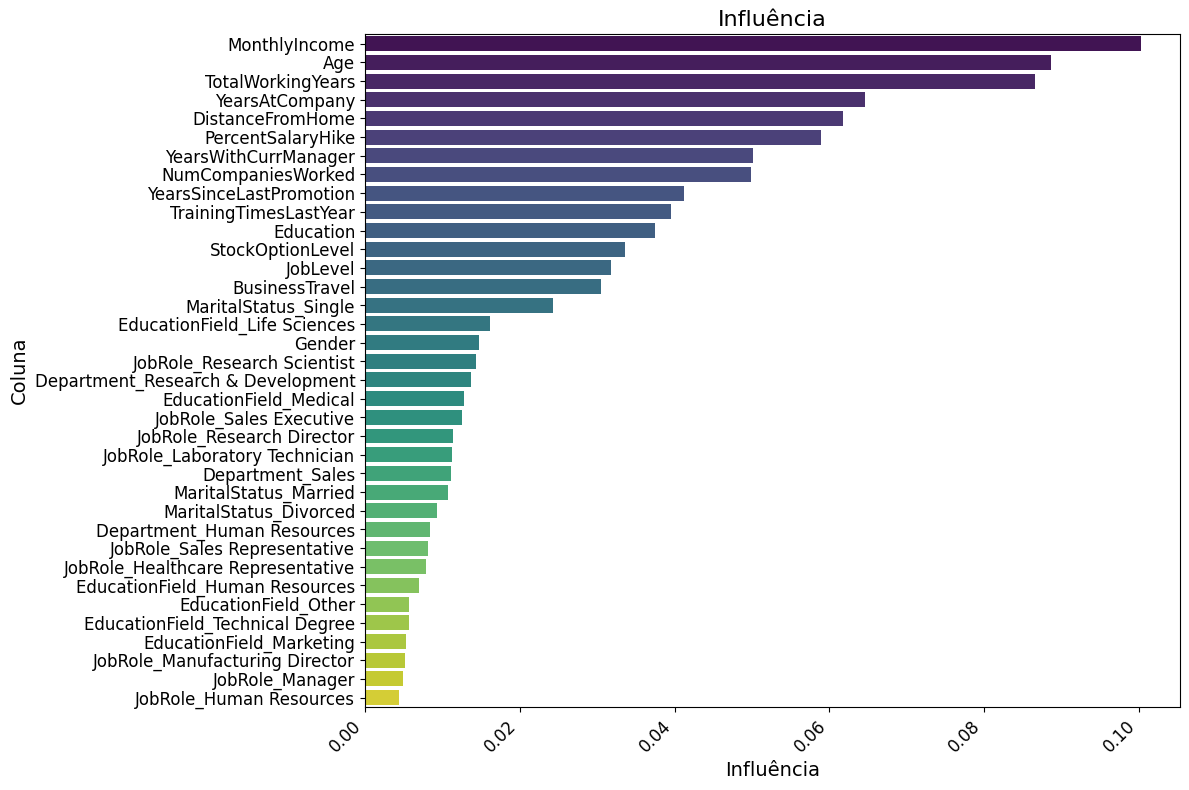

In [182]:
import matplotlib.pyplot as plt
importances = final_model.feature_importances_

importances_df = pd.DataFrame({
    'Column': all_columns,
    'Importance': importances
})

importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Column', data=importances_df, hue='Column', palette='viridis', legend=False)

plt.title('Influência', fontsize=16)
plt.xlabel('Influência', fontsize=14)
plt.ylabel('Coluna', fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()

plt.show()